# Covid-Vaccinations
- An analysis on covid vaccination drive across the globe
- The dataset contains information till 24th May,2021

### Importing Libraries
The following libraries are used in this project:
- numpy,pandas
- matplotlib,seaborn
- plotly,cufflinks

In [2]:
# analysis libraries
import pandas as pd
import numpy as np

In [3]:
# visualisation libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [23]:
# interactive visualisatio libraries
import plotly
from plotly import __version__
print(__version__)
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
init_notebook_mode(connected=True)
import chart_studio.plotly as py   
import plotly.graph_objs as go
import plotly.express as px

import cufflinks as cf
cf.go_offline()

4.14.3


### Loading Data

In [5]:
man = pd.read_csv('country_vaccinations_by_manufacturer.csv')    #manufacturing dataset
vac = pd.read_csv('country_vaccinations.csv')                    #vaccine dataset

In [6]:
#manufacturing dataset info
man.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4286 entries, 0 to 4285
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   location            4286 non-null   object
 1   date                4286 non-null   object
 2   vaccine             4286 non-null   object
 3   total_vaccinations  4286 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 134.1+ KB


In [7]:
man.head()

,location,date,vaccine,total_vaccinations
0,Chile,2020-12-24,Pfizer/BioNTech,420
1,Chile,2020-12-25,Pfizer/BioNTech,5198
2,Chile,2020-12-26,Pfizer/BioNTech,8338
3,Chile,2020-12-27,Pfizer/BioNTech,8649
4,Chile,2020-12-28,Pfizer/BioNTech,8649


In [8]:
#vaccination dataset info
vac.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20390 entries, 0 to 20389
Data columns (total 15 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   country                              20390 non-null  object 
 1   iso_code                             20390 non-null  object 
 2   date                                 20390 non-null  object 
 3   total_vaccinations                   11618 non-null  float64
 4   people_vaccinated                    10859 non-null  float64
 5   people_fully_vaccinated              8386 non-null   float64
 6   daily_vaccinations_raw               9671 non-null   float64
 7   daily_vaccinations                   20176 non-null  float64
 8   total_vaccinations_per_hundred       11618 non-null  float64
 9   people_vaccinated_per_hundred        10859 non-null  float64
 10  people_fully_vaccinated_per_hundred  8386 non-null   float64
 11  daily_vaccinations_per_milli

In [9]:
vac

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,0.00,0.00,NaN,NaN,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm...",World Health Organization,https://covid19.who.int/
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm...",World Health Organization,https://covid19.who.int/
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm...",World Health Organization,https://covid19.who.int/
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm...",World Health Organization,https://covid19.who.int/
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm...",World Health Organization,https://covid19.who.int/
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20385,Zimbabwe,ZWE,2021-05-20,867396.0,615296.0,252100.0,22712.0,16482.0,5.84,4.14,1.70,1109.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1396903351...
20386,Zimbabwe,ZWE,2021-05-21,887928.0,624665.0,263263.0,20532.0,16098.0,5.97,4.20,1.77,1083.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1396903351...
20387,Zimbabwe,ZWE,2021-05-22,904073.0,630348.0,273725.0,16145.0,15823.0,6.08,4.24,1.84,1065.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1396903351...
20388,Zimbabwe,ZWE,2021-05-23,911033.0,632496.0,278537.0,6960.0,16298.0,6.13,4.26,1.87,1097.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1396903351...


### Vaccine Manufacturing Analysis

In [10]:
# total number of vaccines produces by countries by 24th May,2021.
man.groupby('location').sum().iplot(kind='bar',title = 'Number of Vaccines Manufactured by Countries')

**United States tops the list, manufacturing close to 18 Billion vaccines in the specified time period, followed by Germany,France, Italy and Chile.** 

In [11]:
# number of different vaccines manufactured by differetn countries
dist = man.groupby(by=['vaccine','location']).sum()['total_vaccinations'].unstack()
dist

location,Chile,Czechia,France,Germany,Iceland,Italy,Latvia,Lithuania,Romania,United States
vaccine,,,,,,,,,,
Johnson&Johnson,NaN,509329.0,3.643447e+06,1.376256e+06,199730.0,6.533287e+06,87750.0,136160.0,635067.0,4.911030e+08
Moderna,NaN,20992894.0,1.170654e+08,1.178762e+08,930397.0,9.790811e+07,4117825.0,5751691.0,29083170.0,8.122862e+09
Oxford/AstraZeneca,2173913.0,24267439.0,2.505403e+08,3.757724e+08,2476882.0,2.765145e+08,9219991.0,14517164.0,38938163.0,NaN
Pfizer/BioNTech,136079297.0,180268129.0,1.180211e+09,1.573833e+09,6676821.0,1.094985e+09,8651401.0,51210708.0,324109746.0,9.504385e+09
Sinovac,933666236.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

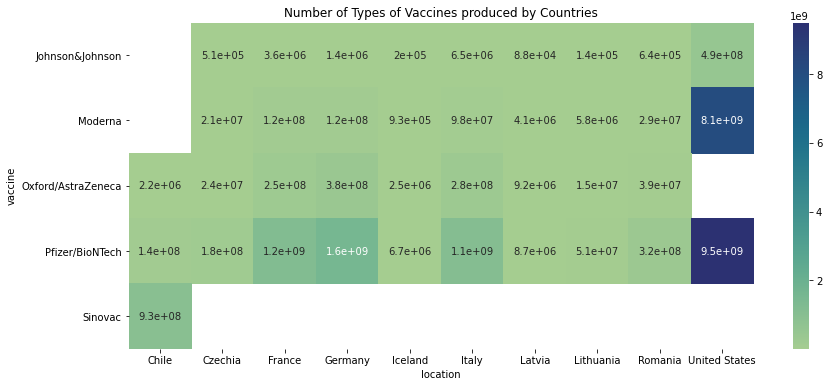

In [12]:
fig,axes = plt.subplots(figsize=(14,6))
sns.heatmap(dist,annot=True,ax=axes,cmap='crest')
axes.set_title('Number of Types of Vaccines produced by Countries')
plt.tight_layout

- **Johnson&Johnson is not manufactured by Chile, Sinovac is manufactured only by Chile**
- **United States does'nt manufacture AstraZeneca**
- **The heatmap shows the vaccine production numbers, the larger the production, darker is the colour and vice versa as depicted in the colourbar**

In [13]:
#converting the date from str to timeStamp dtype
man['date'] = pd.to_datetime(man['date'])
type(man['date'].iloc[0])

pandas._libs.tslibs.timestamps.Timestamp

In [14]:
# production by countires based by dates
man[man['location']=='Chile'].groupby(by='date').sum().iplot(title='Chile')
man[man['location']=='Czechia'].groupby(by='date').sum().iplot(title='Czechia')
man[man['location']=='France'].groupby(by='date').sum().iplot(title='France')
man[man['location']=='Germany'].groupby(by='date').sum().iplot(title='Germany')
man[man['location']=='Iceland'].groupby(by='date').sum().iplot(title='Iceland')
man[man['location']=='Italy'].groupby(by='date').sum().iplot(title='Italy')
man[man['location']=='Latvia'].groupby(by='date').sum().iplot(title='Latvia')
man[man['location']=='Lithuania'].groupby(by='date').sum().iplot(title='Lithuania')
man[man['location']=='Romania'].groupby(by='date').sum().iplot(title='Romania')
man[man['location']=='United States'].groupby(by='date').sum().iplot(title='United States')

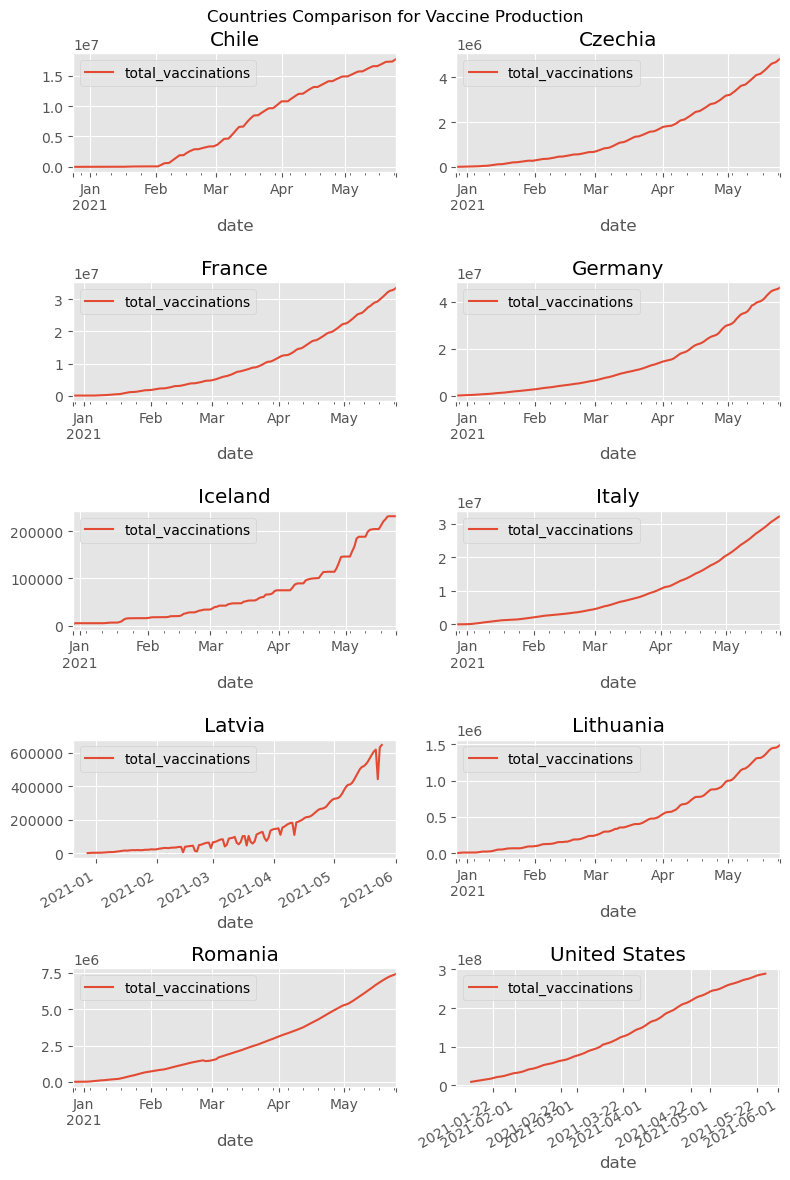

In [15]:
#plotting all together for comparison
plt.style.use('ggplot')
fig,axes = plt.subplots(5,2,dpi=100,figsize=(8,12))
fig.suptitle('Countries Comparison for Vaccine Production')
man[man['location']=='Chile'].groupby(by='date').sum().plot(title='Chile',ax=axes[0,0])
man[man['location']=='Czechia'].groupby(by='date').sum().plot(title='Czechia',ax=axes[0,1])
man[man['location']=='France'].groupby(by='date').sum().plot(title='France',ax=axes[1,0])
man[man['location']=='Germany'].groupby(by='date').sum().plot(title='Germany',ax=axes[1,1])
man[man['location']=='Iceland'].groupby(by='date').sum().plot(title='Iceland',ax=axes[2,0])
man[man['location']=='Italy'].groupby(by='date').sum().plot(title='Italy',ax=axes[2,1])
man[man['location']=='Latvia'].groupby(by='date').sum().plot(title='Latvia',ax=axes[3,0])
man[man['location']=='Lithuania'].groupby(by='date').sum().plot(title='Lithuania',ax=axes[3,1])
man[man['location']=='Romania'].groupby(by='date').sum().plot(title='Romania',ax=axes[4,0])
man[man['location']=='United States'].groupby(by='date').sum().plot(title='United States',ax=axes[4,1])
plt.tight_layout()

**The above two visuals show the comparison between countries according to the vaccines manufactured with time**

<Figure size 432x288 with 0 Axes>

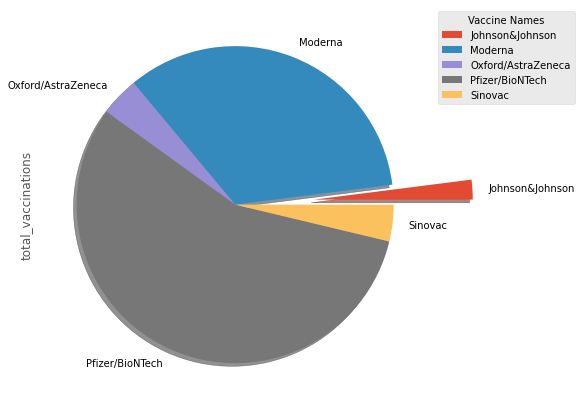

In [16]:
# different vaccines manufactured
plt.figure()
man.groupby(by='vaccine').sum().plot.pie(y='total_vaccinations',figsize=(8,8),explode=[0.5, 0, 0, 0,0],shadow=True)
plt.legend(title='Vaccine Names',loc=0,bbox_to_anchor=(1,1))
plt.tight_layout()

**Pfizer has the maximum production and Johnson&Johnson has least production as depicted by the extracted part.**

### Vaccine Doses

In [17]:
vac.head()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm...",World Health Organization,https://covid19.who.int/
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm...",World Health Organization,https://covid19.who.int/
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm...",World Health Organization,https://covid19.who.int/
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm...",World Health Organization,https://covid19.who.int/
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm...",World Health Organization,https://covid19.who.int/


In [18]:
vac.groupby(by='iso_code').sum()

,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million
iso_code,,,,,,,,,
ABW,3073392.0,2060544.0,1012848.0,62812.0,81921.0,2878.59,1929.95,948.65,767296.0
AFG,2047880.0,1817786.0,230094.0,0.0,558992.0,5.27,4.67,0.59,14373.0
AGO,3617366.0,3375405.0,241961.0,0.0,698022.0,11.00,10.26,0.74,21247.0
AIA,49048.0,43841.0,5207.0,1421.0,12901.0,326.94,292.23,34.71,859944.0
ALB,21731066.0,5058052.0,2426797.0,537938.0,707882.0,755.12,175.75,84.33,245971.0
...,...,...,...,...,...,...,...,...,...
WSM,68357.0,68357.0,0.0,0.0,19591.0,34.46,34.46,0.00,98740.0
YEM,18555.0,18555.0,0.0,0.0,0.0,0.06,0.06,0.00,0.0
ZAF,17859144.0,12110029.0,11947748.0,588200.0,640058.0,30.12,20.42,20.15,10789.0


In [19]:
#Distribution of fully vaccinated people
data = dict(type='choropleth',
           colorscale = 'Jet',
           z = vac['people_fully_vaccinated'],
           locations = vac['iso_code'],
           locationmode = 'ISO-3',
           marker = dict(line = dict(color = 'black',width = 1)),
           colorbar = {'title':{'text':'People Fully Vaccinated'}})

In [20]:
layout = dict(
    title = {'text':'Fully Vaccinated People'},
    geo = dict(scope = 'world',
    projection = {'type':'natural earth'},
    showframe = False,showcoastlines=True,
    coastlinecolor = '#444')
)

In [21]:
fig = go.Figure(data=[data],layout=layout)
fig.show()